In [1]:
import numpy as np
from ase import Atoms
from ase.build import molecule
from ase.calculators.tip4p import TIP4P
from ase.visualize import view
np.random.seed(42)

In [2]:
atoms = Atoms()
atoms.cell = (20, 20, 20)

h2o = molecule('H2O')
h2o.rotate('z', 'x')
h2o.rotate('x', 'y')
translate_vectors = [[i, j, 0] for i in [0,4,8] for j in [0,4,8]]

for i, vec in enumerate(translate_vectors):
    add = h2o.copy()
    add.set_tags([i]*len(add))
    add.translate(vec)
    atoms += add
initial = atoms.copy()
initial.pbc = True

In [3]:
# view(initial)

In [4]:
import sys
sys.path.append('../')
from asetil.monte_carlo.monte_carlo import MonteCarlo
from asetil.monte_carlo.proposer import TranslateProposer, RotateProposer
from asetil.monte_carlo.selector import RandomTagSelector
from asetil.monte_carlo.logger import MCPrintLogger, MCPFileLogger, MCInMemoryLogger

In [5]:
proposers = [
    TranslateProposer(tag_selector=RandomTagSelector(), x_range=(-0.5, 0.5), y_range=(-0.5, 0.5), z_range=(0,1e-8)),
    RotateProposer(tag_selector=RandomTagSelector())
]
loggers = [
    MCPrintLogger(log_interval=10),
    MCPFileLogger(log_interval=10, out_file='example1.log', force_overwrite=True),
    MCInMemoryLogger(log_interval=10)
]
mc = MonteCarlo(temperature= 300,max_iter=1000, proposers= proposers, loggers=loggers)
initial.calc = TIP4P()
ret = mc.run(initial)
ret.wrap()

initializing loggers
 iteration,   proposer.name,   potential_energy,    delta_e,   acceptability,  is_accepted
         0,       Translate,          -0.019477,   0.035377,        0.254500,        False
        10,       Translate,          -0.167852,  -0.051648,        1.000000,         True
        20,          Rotate,          -0.214689,   0.056616,        0.111916,        False
        30,       Translate,          -0.260501,  -0.006122,        1.000000,         True
        40,       Translate,          -0.445874,  -0.009078,        1.000000,         True
        50,       Translate,          -0.429557,   0.008415,        0.722150,        False
        60,          Rotate,          -0.546323,  -0.042342,        1.000000,         True
        70,          Rotate,          -0.580789,  -0.030747,        1.000000,         True
        80,       Translate,          -0.716267,  -0.005391,        1.000000,         True
        90,          Rotate,          -0.536938,   0.236560,        0

In [6]:
view(ret)

<Popen: returncode: None args: ['c:\\Users\\User\\AppData\\Local\\pypoetry\\...>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
log, columns = loggers[2].get_log(with_columns=True)
df = pd.DataFrame(log, columns=columns)
df

C:\Users\User\AppData\Local\Temp\ipykernel_2908\2265960461.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,iteration,proposer.name,potential_energy,delta_e,acceptability,is_accepted
0,0,Translate,-0.019477,0.035377,2.545004e-01,False
1,1,Rotate,0.067827,0.122681,8.690508e-03,False
2,2,Rotate,-0.007348,0.047506,1.591964e-01,False
3,3,Translate,-0.055983,-0.001129,1.000000e+00,True
4,4,Rotate,-0.097764,-0.041780,1.000000e+00,True
...,...,...,...,...,...,...
995,995,Rotate,-0.842409,1.074831,8.782544e-19,False
996,996,Translate,55.065253,56.982493,6.504964e-01,True
997,997,Rotate,-0.884557,-55.949810,6.893295e-18,False
998,998,Rotate,-1.866821,-56.932074,2.186441e-01,False


[Text(0.5, 0, 'iteration'), Text(0, 0.5, 'potential energy')]

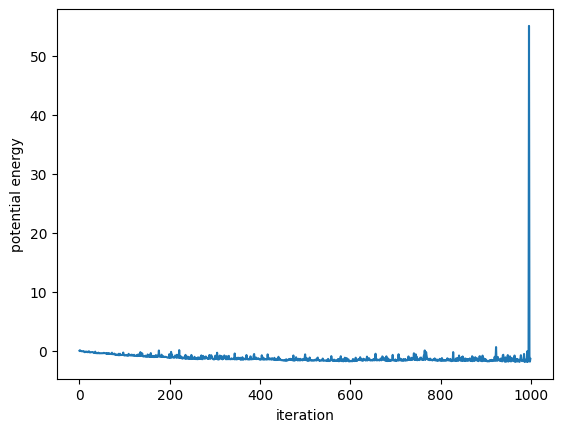

In [9]:
fig, ax = plt.subplots()
ax.plot(df['iteration'], df['potential_energy'])
ax.set(xlabel='iteration', ylabel='potential energy')